In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df= pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [77]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [78]:
df = df.drop(columns=['UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'])
df.head()

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...


In [92]:
len(df['Text'])


568454

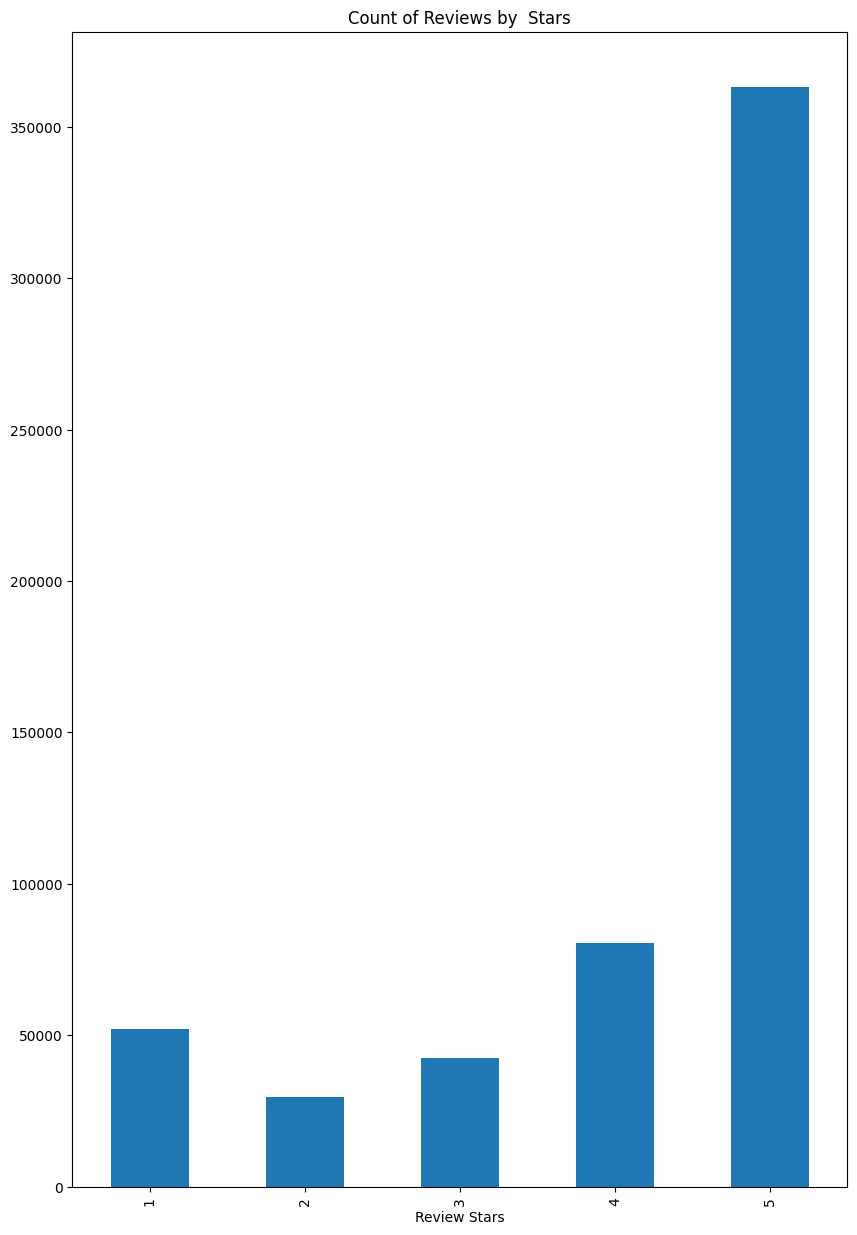

In [93]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
        title = 'Count of Reviews by  Stars',
        figsize=(10,15))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
STEP:1 SENTIMETN SCORING
    We will use sentiment analyser to get neg\pos\nue values of the data

In [94]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sent = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Lankala
[nltk_data]     Vinay Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [95]:
sent.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [121]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id' ]
    res[myid] = sent.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [122]:
vaders= pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index" : 'Id'})
vaders =  vaders.merge(df,how='left')

In [123]:
vaders


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


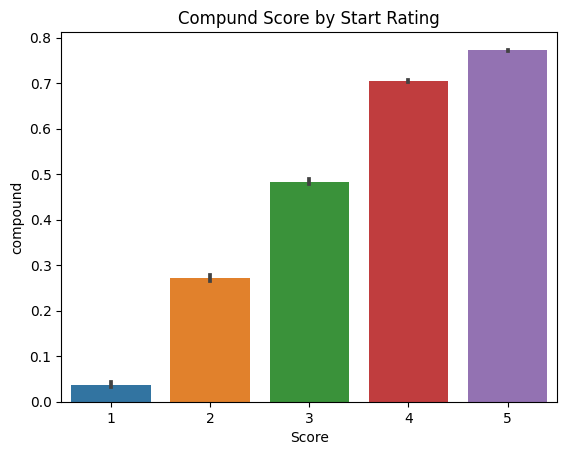

In [124]:
ax = sns.barplot(data=vaders,x ='Score',y='compound')
ax.set_title('Compund Score by Start Rating')
plt.show()

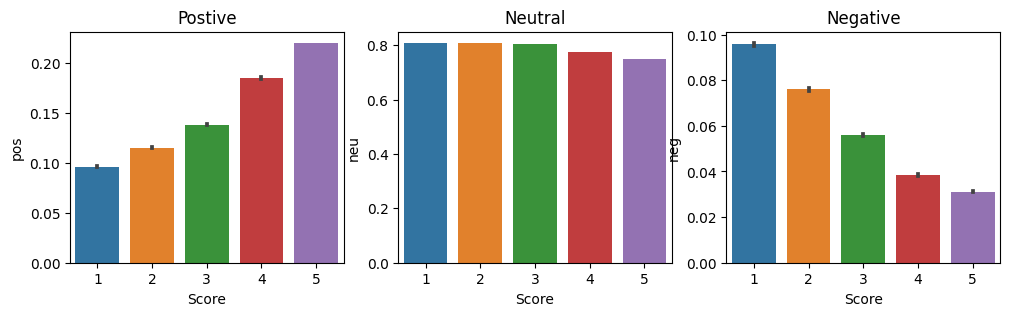

In [128]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x="Score",y="pos",ax=axs[0])
sns.barplot(data=vaders,x="Score",y='neu',ax=axs[1])
sns.barplot(data=vaders,x="Score",y="neg",ax=axs[2])
axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


Using Roberta Pretrained model
pretrained RoBERTa model for sentiment analysis. RoBERTa (A Robustly Optimized BERT Pretraining Approach) is a transformer model developed by Facebook AI, designed to improve upon BERT's performance by modifying the training approach and dataset size.

In [130]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [131]:
model= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer= AutoTokenizer.from_pretrained(model)
model=AutoModelForSequenceClassification.from_pretrained(model)

C:\Users\Lankala Vinay Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

C:\Users\Lankala Vinay Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lankala Vinay Kumar\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [134]:
example= "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

print(example)
sent.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [137]:
encoded_text = tokenizer(example,return_tensors='pt')
output=  model(**encoded_text)
scores= output[0][0].detach().numpy()
scores=softmax(scores)
print(scores)

[0.97635514 0.02068747 0.00295737]


In [146]:
res = {}

for i, row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sent.polarity_scores(text)
        vader_result_rename = {}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
            roberta_result = polarity_scores_roberta(text)
            both = {**vader_result_rename,**roberta_result}
            res[myid] = both
    except RuntimeError:
            print(f'Broke for id{myid}')

  0%|          | 0/568454 [00:00<?, ?it/s]

Broke for id83
Broke for id187


KeyboardInterrupt: 

In [ ]:
res

In [150]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how= 'left')                                           

In [151]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

C:\Users\Lankala Vinay Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


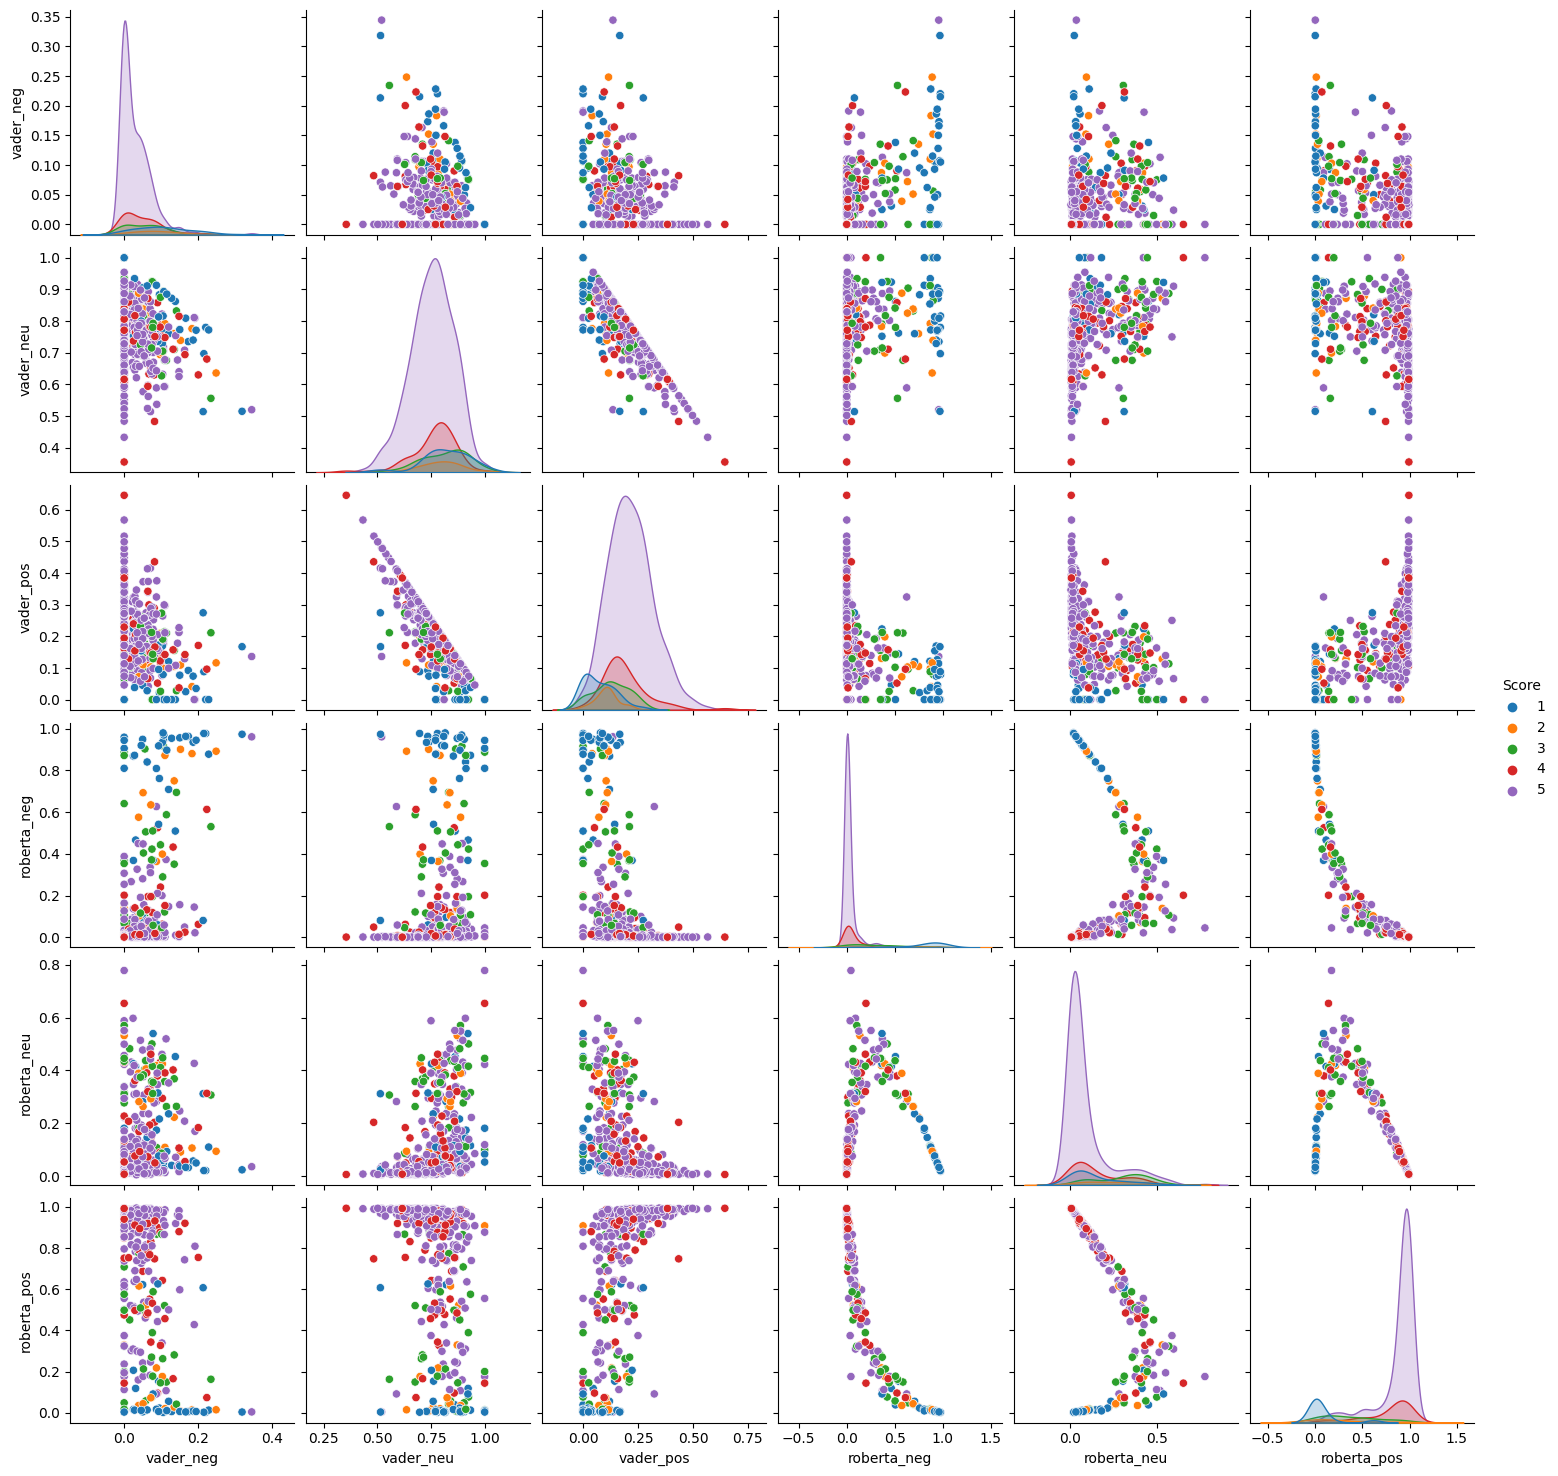

In [154]:
sns.pairplot(data=results_df,vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],hue='Score',palette='tab10')
plt.show()

In [159]:
results_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [160]:
results_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [162]:
results_df.query('Score==5').sort_values('roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [165]:
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [167]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [170]:
sent_pipeline('fuck off')

[{'label': 'NEGATIVE', 'score': 0.9982744455337524}]